In [1]:
import random
import math
import numpy as np

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer
import qiskit.ignis.verification.randomized_benchmarking as rb

IBMQ.load_account()

Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbs

import smc_linear as smc
Distribution = smc.Distribution

sbs.set(style="darkgrid")

%matplotlib inline

In [3]:
def initial_circuit(n_qubits, n_gates):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    for i in range(n_gates):
        for j in range(n_qubits):
            circuit.x(j)
    
    return circuit

In [4]:
def design_circuit(n_qubits, inv_arr, circuit=None):
    
    if circuit is None:
        circuit = QuantumCircuit(n_qubits, n_qubits)
        
    
    for i, element in enumerate(inv_arr):
        if element == 1:
            circuit.x(i)
    
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
    return circuit

In [9]:
circ = initial_circuit(1, 5)

In [10]:
circ.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘
c_0: ═════════════════════════

In [12]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

n_qubits = 1

n_measurements = 20
n_experiments = 20
n_points = 4000

results = []

for i in range(n_experiments):    

    result_data = {}
    
    circuit = initial_circuit(n_qubits, i)

    result_data['circuit'] = circuit
    result_data['risk'] = []
    result_data['mean'] = []
    result_data['len'] = len(circuit)
    
    dist = Distribution(n_points=n_points, n_qubits=n_qubits)


    for _ in range(n_measurements):
        
        inversion_arr = dist.next_experiment()       
        
        tmp_circuit = copy.deepcopy(circuit)
        tmp_circuit = design_circuit(n_qubits, inversion_arr, circuit=tmp_circuit)

        job = execute(tmp_circuit, backend, shots=1)
        
        result = job.result()
        outcome = list(map(int, list(list(result.get_counts(circuit).keys())[0])))     
        
        print("Measurements: {} Outcome: {}".format(inversion_arr, outcome))
        dist.measure(outcome, inversion_arr)
        
        result_data['risk'].append(dist.calc_bayes_risk())
        result_data['mean'].append(dist.calc_bayes_mean())

    
    result_data['distrubtion'] = dist
    results.append(result_data)


Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurem

Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [0]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurements: [1] Outcome: [1]
Measurem

In [13]:
print(results)

[{'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3cd3d87160>, 'risk': [0.010550175645399899, 0.008972342395577235, 0.007800399301730867, 0.007075289167279825, 0.006072920394063262, 0.005824144134647021, 0.005645946238111369, 0.005674703623297015, 0.005704240704300771, 0.005560199549120114, 0.005449582924979083, 0.005362377395453519, 0.005291982860136855, 0.005306252716232434, 0.005246213189312113, 0.004748552285166951, 0.004722705191142626, 0.004701902186222647, 0.0047053992184803205, 0.004687998016971576], 'mean': [array([0.12509802, 0.11799934]), array([0.12494053, 0.16188513]), array([0.1249372 , 0.18426039]), array([0.12493651, 0.19764431]), array([0.12130531, 0.19626786]), array([0.12125584, 0.20310744]), array([0.12109504, 0.20844696]), array([0.12115189, 0.20731033]), array([0.1212067 , 0.20613761]), array([0.12100517, 0.21079672]), array([0.1207723 , 0.21464424]), array([0.12053624, 0.21789236]), array([0.12031442, 0.22068551]), array([0.12037035, 0.2199

In [31]:
for i in range(len(results)):
    print(results[i]['distrubtion'].calc_bayes_mean())

[0.11922527 0.21922329]
[0.12542873 0.12341642]
[0.11641169 0.2233302 ]
[0.12127065 0.11467757]
[0.12223658 0.2242921 ]
[0.12336171 0.18966555]
[0.11542522 0.22156043]
[0.12764724 0.15248065]
[0.1256114  0.22536679]
[0.12554046 0.19097198]
[0.11771773 0.21867409]
[0.12570477 0.12339749]
[0.12050062 0.22382141]
[0.12593544 0.08752078]
[0.11602199 0.22429151]
[0.12447612 0.15229386]
[0.12581882 0.22437927]
[0.12536589 0.15256059]
[0.11649924 0.22387844]
[0.12436851 0.08679794]


In [10]:
bayes_means = np.array([[0.11922527, 0.21922329],
[0.12542873, 0.12341642],
[0.11641169, 0.2233302 ],
[0.12127065, 0.11467757],
[0.12223658, 0.2242921 ],
[0.12336171, 0.18966555],
[0.11542522, 0.22156043],
[0.12764724, 0.15248065],
[0.1256114,  0.22536679],
[0.12554046 ,0.19097198],
[0.11771773 ,0.21867409],
[0.12570477, 0.12339749],
[0.12050062, 0.22382141],
[0.12593544, 0.08752078],
[0.11602199, 0.22429151],
[0.12447612, 0.15229386],
[0.12581882, 0.22437927],
[0.12536589, 0.15256059],
[0.11649924, 0.22387844],
[0.12436851, 0.08679794],
])

In [5]:
for i in bayes_means:
    print(i[1])

0.21922329
0.12341642
0.2233302
0.11467757
0.2242921
0.18966555
0.22156043
0.15248065
0.22536679
0.19097198
0.21867409
0.12339749
0.22382141
0.08752078
0.22429151
0.15229386
0.22437927
0.15256059
0.22387844
0.08679794


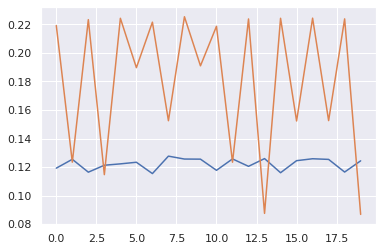

In [19]:
sbs.lineplot(range(len(bayes_means)), bayes_means[:, 0], linestyle='--')
sbs.lineplot(range(len(bayes_means)), bayes_means[:, 1])